In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [3]:
tf.__version__

'2.7.0'

In [19]:
os.getcwd()

'D:\\DLCVANLP\\Deep-Learning-Computer-Vision\\ann-with-callback'

In [21]:
ROOT="D:\\DLCVANLP\\Deep-Learning-Computer-Vision\\ann-with-callback"

In [22]:
os.chdir(ROOT)

In [23]:
!ls

ANN-With-CallBack.ipynb


In [4]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
mnist=tf.keras.datasets.mnist

In [6]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
img=X_train_full[0]

In [11]:
img.shape

(28, 28)

In [12]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

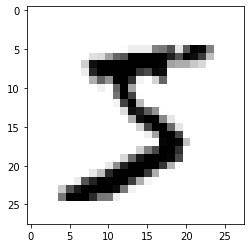

In [13]:
plt.imshow(img,cmap="binary")

<AxesSubplot:>

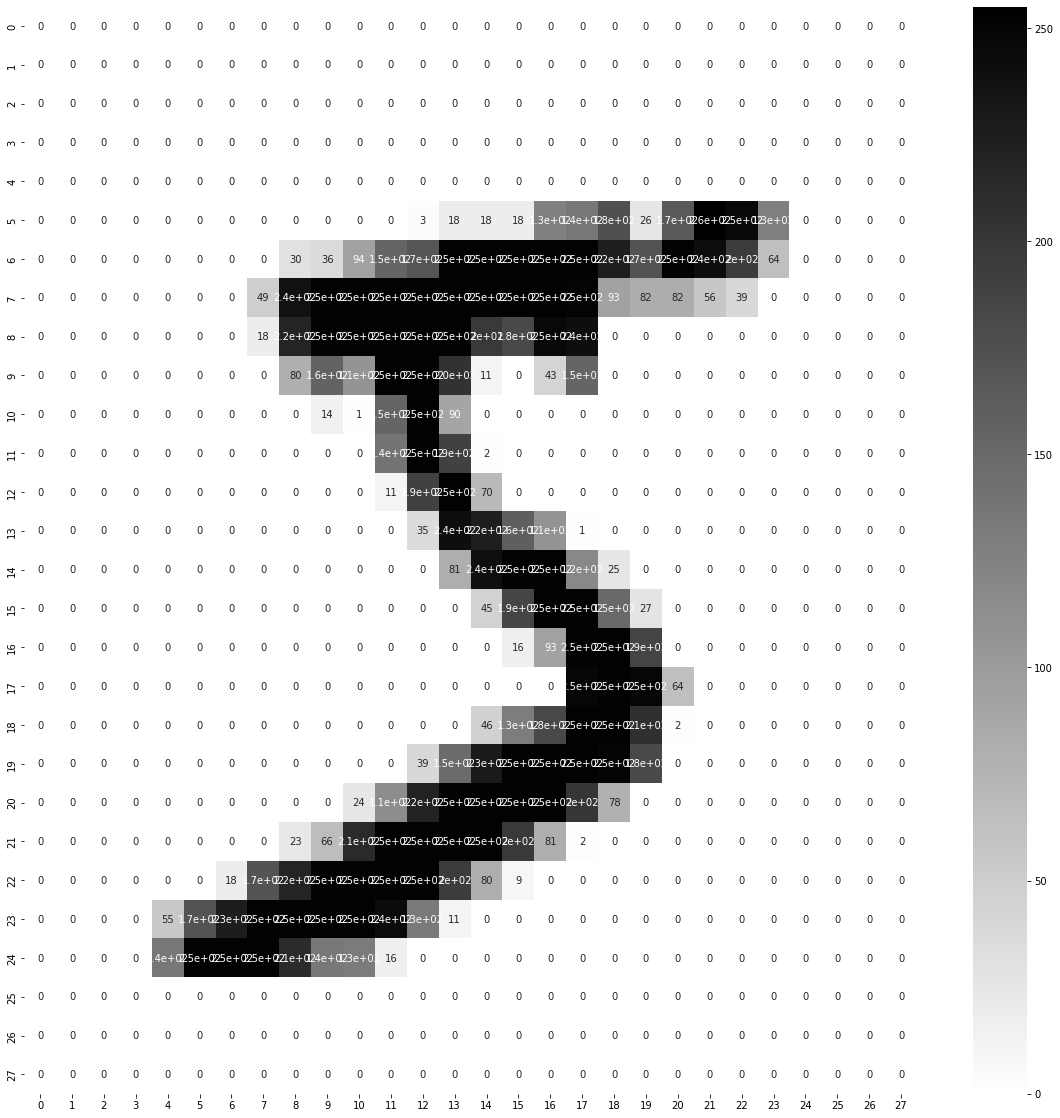

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True,cmap="binary")

<AxesSubplot:>

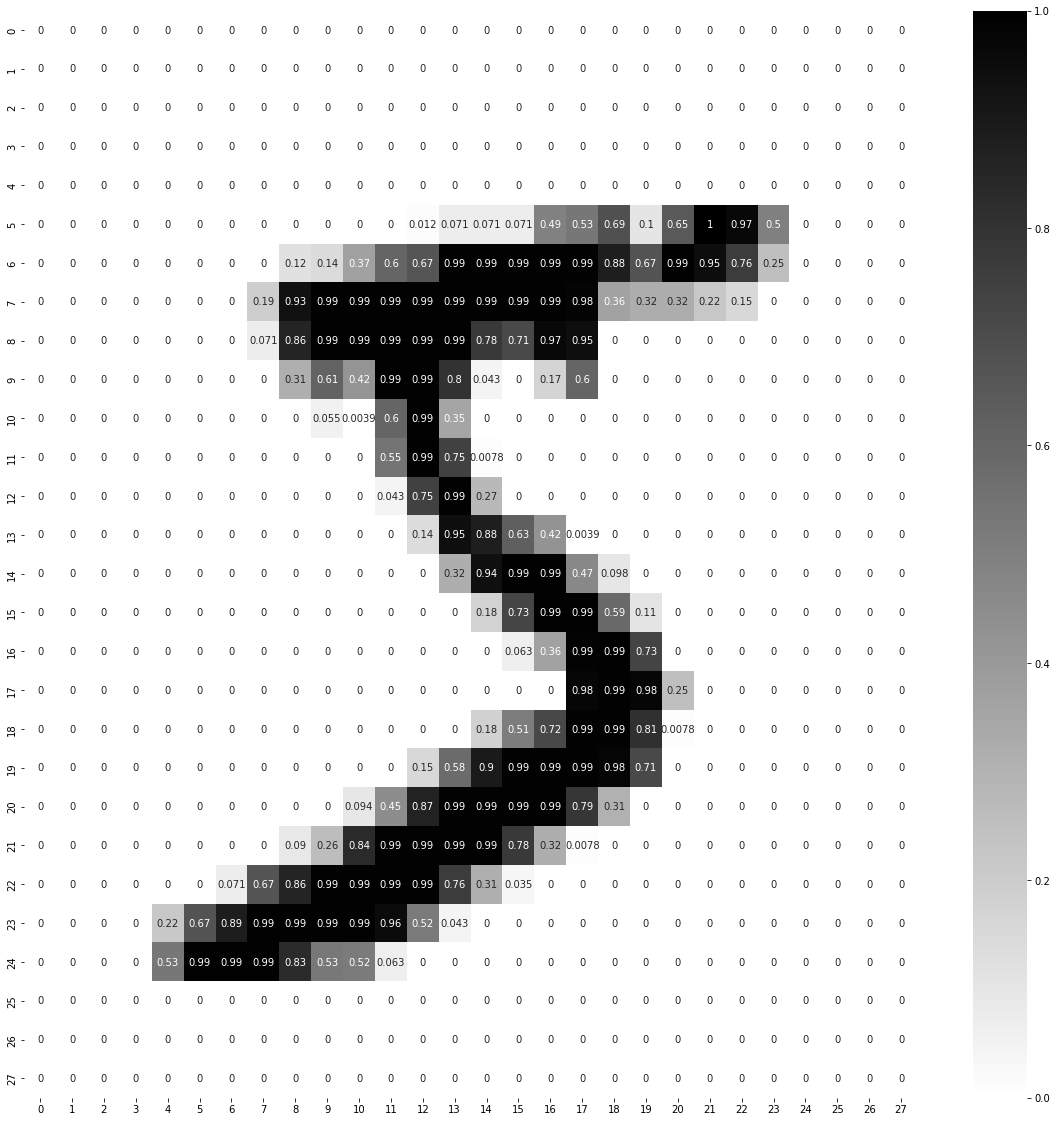

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True, cmap="binary" )

### Tensorboard
write images into the Tensorboard for visualisation

In [29]:
### Create a log dir for tensorboard logs
import time
#time.asctime()
def get_log_path(base_log_dir="logs/fit"):
    uniqueName=time.asctime().replace(" ","_").replace(":","")
    log_path=os.path.join(base_log_dir, uniqueName)
    print(f"saving logs at:{log_path}")
    return log_path
log_dir=get_log_path()
    

saving logs at:logs/fit\Sun_Jan_23_090841_2022


In [28]:
time.asctime()

'Sun Jan 23 09:05:00 2022'

In [31]:
file_writer=tf.summary.create_file_writer(logdir=log_dir)

In [33]:
with file_writer.as_default():
    images=np.reshape(X_train_full[10:30],(-1,28,28,1))###20 or -1=> can be anything, it will generate matrix of matrix or array of images and it will contain 20 such a images
    tf.summary.image("20 handwrite digit samples", images, max_outputs=25, step=0)

In [34]:
images.shape

(20, 28, 28, 1)

In [35]:
%load_ext tensorboard

In [58]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14868), started 0:55:56 ago. (Use '!kill 14868' to kill it.)

In [17]:
X_valid,X_train=X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255

In [37]:
CLASSES=10
LAYERS=[
    tf.keras.layers.Flatten(input_shape=(28,28), name="InputLayers"),
    tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="OutpuLayer"),
]

In [38]:
model_clf=tf.keras.Sequential(LAYERS)
model_clf.layers

In [39]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayers (Flatten)       (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutpuLayer (Dense)          (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_clf.layers[1].name

'HiddenLayer1'

In [41]:
weights,biases=model_clf.layers[1].get_weights()

In [42]:
weights

array([[-0.03146461,  0.05712044,  0.02989204, ...,  0.01229084,
         0.04207166,  0.04114129],
       [ 0.06928881,  0.02226674,  0.00868051, ...,  0.0444592 ,
         0.02939682, -0.07119405],
       [ 0.01793294, -0.01352696,  0.05993229, ...,  0.02387208,
        -0.0678439 ,  0.04816467],
       ...,
       [ 0.07363139, -0.04297951, -0.07289566, ...,  0.06671168,
         0.03274106, -0.04491758],
       [ 0.01951334, -0.06023814, -0.06648694, ...,  0.04160193,
         0.02183446, -0.07420736],
       [-0.03559164, -0.07438564,  0.0121583 , ...,  0.05298306,
         0.04841808,  0.02580271]], dtype=float32)

In [43]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
weights.shape

(784, 300)

In [45]:
biases.shape

(300,)

In [46]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,
                 optimizer=OPTIMIZER,
                 metrics=METRICS)

### TensorBorad Callback

In [50]:
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

### Early stoping callback

In [51]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

### Model Checkpointing callbacks

In [55]:
ckpt_path="model_ckpt.h5"
ckpt_cb=tf.keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only=True)

In [56]:
CALLBACK_LIST=[tensorboard_cb,early_stopping_cb,ckpt_cb]

In [57]:
EPOCHS=30
VALIDATION=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,
                     epochs=EPOCHS,batch_size=16,
                     validation_data=VALIDATION, callbacks=CALLBACK_LIST)

Epoch 1/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.0192 - accuracy: 0.9960 - val_loss: 0.0683 - val_accuracy: 0.9810
Epoch 2/30
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 0.0693 - val_accuracy: 0.9802
Epoch 3/30
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0155 - accuracy: 0.9972 - val_loss: 0.0740 - val_accuracy: 0.9788
Epoch 4/30
3438/3438 [==============================] - 10s 3ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 0.0671 - val_accuracy: 0.9828
Epoch 5/30
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0127 - accuracy: 0.9981 - val_loss: 0.0680 - val_accuracy: 0.9806
Epoch 6/30
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0116 - accuracy: 0.9985 - val_loss: 0.0669 - val_accuracy: 0.9810
Epoch 7/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.0730 - val_accurac